In [ ]:
#this notebook simply runs a neural synth but uses masks generated by the CompositionGAN
#the improvement is that neural synth no longer clutters the whole frame and its output 
#is organized in a meaningful composition
#Ive taken this a step further and saved the outputs as black and white images. One way to 
#improve this work would be to find a way to make a neural synth be selective about it's 
#color pallette. 

In [1]:
from __future__ import print_function
from io import BytesIO
import math, time, copy, json, os
import glob
from os import listdir
from os.path import isfile, join
from random import random
from io import BytesIO
from enum import Enum
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import scipy.misc
import tensorflow as tf
from lapnorm import *
import pandas as pd
import matplotlib.pyplot as plt
import cv2

/home/tait/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Number of layers 59
Total number of feature channels: 7548


In [2]:
def lapnorm_multi(t_obj, img0, mask, iter_n=10, step=1.0, oct_n=3, oct_s=1.4, lap_n=4, clear=True):
    mask_sizes = get_mask_sizes(mask.shape[0:2], oct_n, oct_s)
    img0 = resize(img0, np.int32(mask_sizes[0])) 
    t_score = [tf.reduce_mean(t) for t in t_obj] # defining the optimization objective
    t_grad = [tf.gradients(t, t_input)[0] for t in t_score] # behold the power of automatic differentiation!
    # build the laplacian normalization graph
    lap_norm_func = tffunc(np.float32)(partial(lap_normalize, scale_n=lap_n))
    img = img0.copy()
    for octave in range(oct_n):
        if octave>0:
            hw = mask_sizes[octave] #np.float32(img.shape[:2])*oct_s
            img = resize(img, np.int32(hw))
        oct_mask = resize(mask, np.int32(mask_sizes[octave]))
        for i in range(iter_n):
            g_tiled = [lap_norm_func(calc_grad_tiled(img, t)) for t in t_grad]
            for g, gt in enumerate(g_tiled):
                img += gt * step * oct_mask[:,:,g].reshape((oct_mask.shape[0],oct_mask.shape[1],1))
            print('.', end='')
        print("octave %d/%d"%(octave+1, oct_n))
    if clear:
        clear_output()
    return img

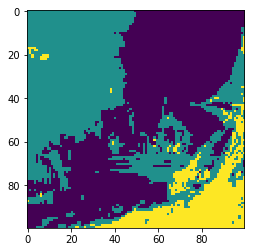

In [3]:
# bring in clusters and do some formatting
clusters = pd.read_csv('../data/compositions.csv')

cArray = np.array(clusters)
cArray = np.delete(cArray, (0), axis=1)

plt.imshow(cArray[21].reshape(100, 100))

....................octave 1/3
....................octave 2/3
....................octave 3/3


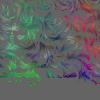

....................octave 1/3
....................octave 2/3
....................octave 3/3


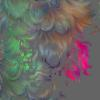

....................octave 1/3
....................octave 2/3
....................octave 3/3


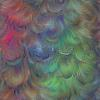

....................octave 1/3
....................octave 2/3
....................octave 3/3


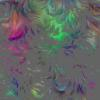

....................octave 1/3
....................octave 2/3
....................octave 3/3


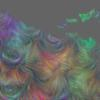

....................octave 1/3
....................octave 2/3
....................octave 3/3


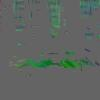

....................octave 1/3
....................octave 2/3
....................octave 3/3


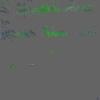

....................octave 1/3
....................octave 2/3
....................octave 3/3


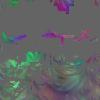

....................octave 1/3
....................octave 2/3
....................octave 3/3


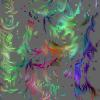

....................octave 1/3
....................octave 2/3
....................octave 3/3


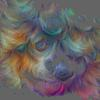

....................octave 1/3
....................octave 2/3
....................octave 3/3


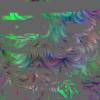

....................octave 1/3
....................octave 2/3
....................octave 3/3


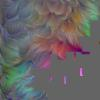

....................octave 1/3
....................octave 2/3
....................octave 3/3


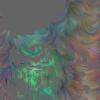

....................octave 1/3
....................octave 2/3
....................octave 3/3


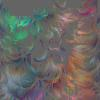

....................octave 1/3
....................octave 2/3
....................octave 3/3


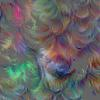

....................octave 1/3
....................octave 2/3
....................octave 3/3


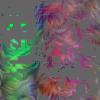

....................octave 1/3
....................octave 2/3
....................octave 3/3


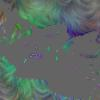

....................octave 1/3
....................octave 2/3
....................octave 3/3


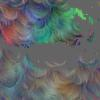

....................octave 1/3
....................octave 2/3
....................octave 3/3


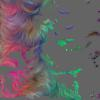

....................octave 1/3
....................octave 2/3
....................octave 3/3


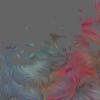

....................octave 1/3
....................octave 2/3
....................octave 3/3


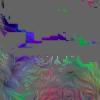

....................octave 1/3
....................octave 2/3
....................octave 3/3


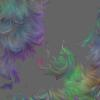

....................octave 1/3
....................octave 2/3
....................octave 3/3


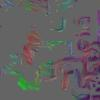

....................octave 1/3
....................octave 2/3
....................octave 3/3


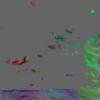

....................octave 1/3
....................octave 2/3
....................octave 3/3


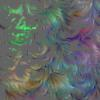

....................octave 1/3
....................octave 2/3
....................octave 3/3


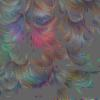

....................octave 1/3
....................octave 2/3
....................octave 3/3


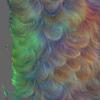

....................octave 1/3
....................octave 2/3
....................octave 3/3


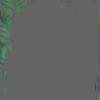

....................octave 1/3
....................octave 2/3
....................octave 3/3


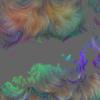

....................octave 1/3
....................octave 2/3
....................octave 3/3


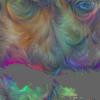

....................octave 1/3
....................octave 2/3
....................octave 3/3


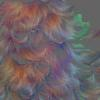

....................octave 1/3
....................octave 2/3
....................octave 3/3


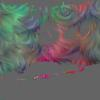

....................octave 1/3
....................octave 2/3
....................octave 3/3


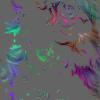

....................octave 1/3
....................octave 2/3
....................octave 3/3


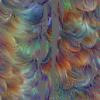

....................octave 1/3
....................octave 2/3
....................octave 3/3


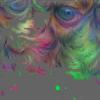

....................octave 1/3
....................octave 2/3
....................octave 3/3


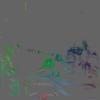

....................octave 1/3
....................octave 2/3
....................octave 3/3


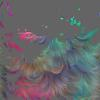

....................octave 1/3
....................octave 2/3
....................octave 3/3


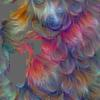

....................octave 1/3
....................octave 2/3
....................octave 3/3


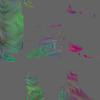

....................octave 1/3
....................octave 2/3
....................octave 3/3


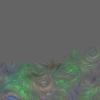

....................octave 1/3
....................octave 2/3
....................octave 3/3


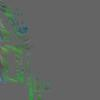

....................octave 1/3
....................octave 2/3
....................octave 3/3


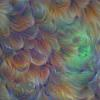

....................octave 1/3
....................octave 2/3
....................octave 3/3


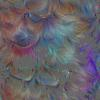

....................octave 1/3
....................octave 2/3
....................octave 3/3


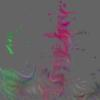

....................octave 1/3
....................octave 2/3
....................octave 3/3


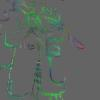

....................octave 1/3
....................octave 2/3
....................octave 3/3


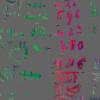

....................octave 1/3
....................octave 2/3
....................octave 3/3


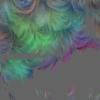

....................octave 1/3
....................octave 2/3
....................octave 3/3


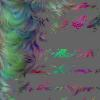

....................octave 1/3
....................octave 2/3
....................octave 3/3


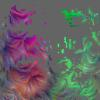

....................octave 1/3
....................octave 2/3
....................octave 3/3


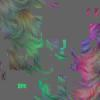

....................octave 1/3
....................octave 2/3
....................octave 3/3


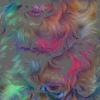

....................octave 1/3
....................octave 2/3
....................octave 3/3


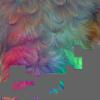

....................octave 1/3
....................octave 2/3
....................octave 3/3


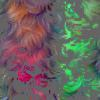

....................octave 1/3
....................octave 2/3
....................octave 3/3


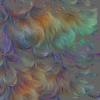

....................octave 1/3
....................octave 2/3
....................octave 3/3


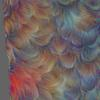

....................octave 1/3
....................octave 2/3
....................octave 3/3


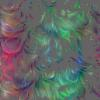

....................octave 1/3
....................octave 2/3
....................octave 3/3


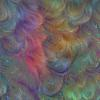

....................octave 1/3
....................octave 2/3
....................octave 3/3


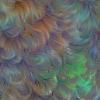

....................octave 1/3
....................octave 2/3
....................octave 3/3


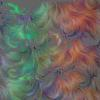

....................octave 1/3
....................octave 2/3
....................octave 3/3


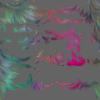

....................octave 1/3
....................octave 2/3
....................octave 3/3


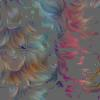

....................octave 1/3
....................octave 2/3
....................octave 3/3


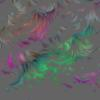

....................octave 1/3
....................octave 2/3
....................octave 3/3


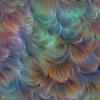

....................octave 1/3
....................octave 2/3
....................octave 3/3


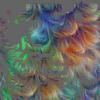

....................octave 1/3
....................octave 2/3
....................octave 3/3


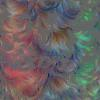

....................octave 1/3
....................octave 2/3
....................octave 3/3


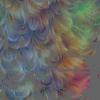

....................octave 1/3
....................octave 2/3
....................octave 3/3


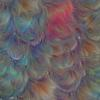

....................octave 1/3
....................octave 2/3
....................octave 3/3


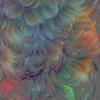

....................octave 1/3
....................octave 2/3
....................octave 3/3


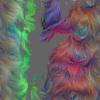

....................octave 1/3
....................octave 2/3
....................octave 3/3


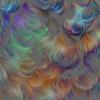

....................octave 1/3
....................octave 2/3
....................octave 3/3


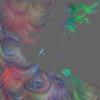

....................octave 1/3
....................octave 2/3
....................octave 3/3


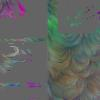

....................octave 1/3
....................octave 2/3
....................octave 3/3


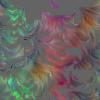

....................octave 1/3
....................octave 2/3
....................octave 3/3


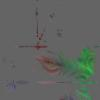

....................octave 1/3
....................octave 2/3
....................octave 3/3


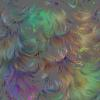

....................octave 1/3
....................octave 2/3
....................octave 3/3


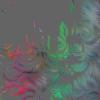

....................octave 1/3
....................octave 2/3
....................octave 3/3


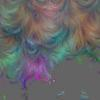

....................octave 1/3
....................octave 2/3
....................octave 3/3


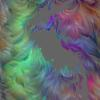

....................octave 1/3
....................octave 2/3
....................octave 3/3


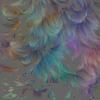

....................octave 1/3
....................octave 2/3
....................octave 3/3


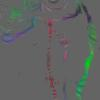

....................octave 1/3
....................octave 2/3
....................octave 3/3


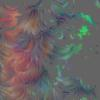

....................octave 1/3
....................octave 2/3
....................octave 3/3


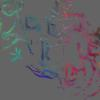

....................octave 1/3
....................octave 2/3
....................octave 3/3


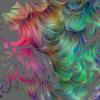

....................octave 1/3
....................octave 2/3
....................octave 3/3


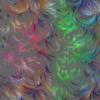

....................octave 1/3
....................octave 2/3
....................octave 3/3


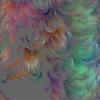

....................octave 1/3
....................octave 2/3
....................octave 3/3


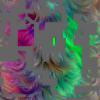

....................octave 1/3
....................octave 2/3
....................octave 3/3


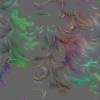

....................octave 1/3
....................octave 2/3
....................octave 3/3


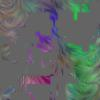

....................octave 1/3
....................octave 2/3
....................octave 3/3


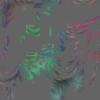

....................octave 1/3
....................octave 2/3
....................octave 3/3


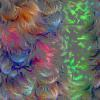

....................octave 1/3
....................octave 2/3
....................octave 3/3


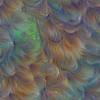

....................octave 1/3
....................octave 2/3
....................octave 3/3


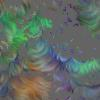

....................octave 1/3
....................octave 2/3
....................octave 3/3


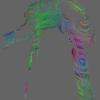

....................octave 1/3
....................octave 2/3
....................octave 3/3


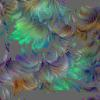

....................octave 1/3
....................octave 2/3
....................octave 3/3


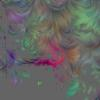

....................octave 1/3
....................octave 2/3
....................octave 3/3


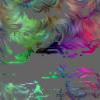

....................octave 1/3
....................octave 2/3
....................octave 3/3


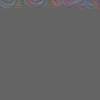

....................octave 1/3
....................octave 2/3
....................octave 3/3


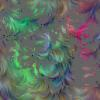

....................octave 1/3
....................octave 2/3
....................octave 3/3


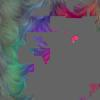

....................octave 1/3
....................octave 2/3
....................octave 3/3


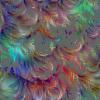

....................octave 1/3
....................octave 2/3
....................octave 3/3


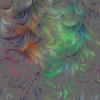

....................octave 1/3
....................octave 2/3
....................octave 3/3


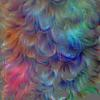

....................octave 1/3
....................octave 2/3
....................octave 3/3


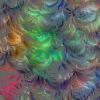

....................octave 1/3
....................octave 2/3
....................octave 3/3


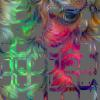

....................octave 1/3
....................octave 2/3
....................octave 3/3


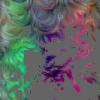

....................octave 1/3
....................octave 2/3
....................octave 3/3


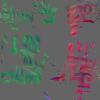

....................octave 1/3
....................octave 2/3
....................octave 3/3


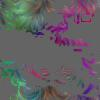

....................octave 1/3
....................octave 2/3
....................octave 3/3


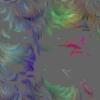

....................octave 1/3
....................octave 2/3
....................octave 3/3


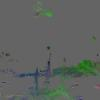

....................octave 1/3
....................octave 2/3
....................octave 3/3


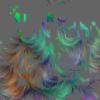

....................octave 1/3
....................octave 2/3
....................octave 3/3


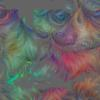

....................octave 1/3
....................octave 2/3
....................octave 3/3


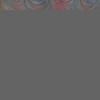

....................octave 1/3
....................octave 2/3
....................octave 3/3


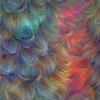

....................octave 1/3
....................octave 2/3
....................octave 3/3


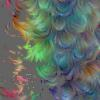

....................octave 1/3
....................octave 2/3
....................octave 3/3


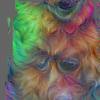

....................octave 1/3
....................octave 2/3
....................octave 3/3


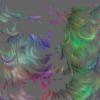

....................octave 1/3
....................octave 2/3
....................octave 3/3


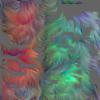

....................octave 1/3
....................octave 2/3
....................octave 3/3


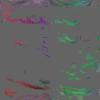

....................octave 1/3
....................octave 2/3
....................octave 3/3


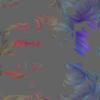

....................octave 1/3
....................octave 2/3
....................octave 3/3


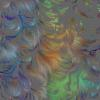

....................octave 1/3
....................octave 2/3
....................octave 3/3


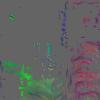

....................octave 1/3
....................octave 2/3
....................octave 3/3


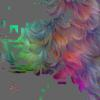

....................octave 1/3
....................octave 2/3
....................octave 3/3


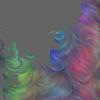

....................octave 1/3
....................octave 2/3
....................octave 3/3


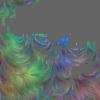

....................octave 1/3
....................octave 2/3
....................octave 3/3


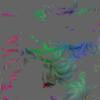

....................octave 1/3
....................octave 2/3
....................octave 3/3


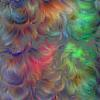

....................octave 1/3
....................octave 2/3
....................octave 3/3


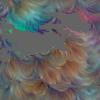

....................octave 1/3
....................octave 2/3
....................octave 3/3


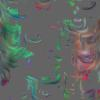

....................octave 1/3
....................octave 2/3
....................octave 3/3


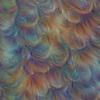

....................octave 1/3
....................octave 2/3
....................octave 3/3


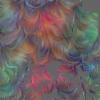

....................octave 1/3
....................octave 2/3
....................octave 3/3


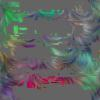

....................octave 1/3
....................octave 2/3
....................octave 3/3


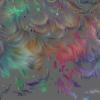

....................octave 1/3
....................octave 2/3
....................octave 3/3


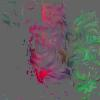

....................octave 1/3
....................octave 2/3
....................octave 3/3


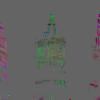

....................octave 1/3
....................octave 2/3
....................octave 3/3


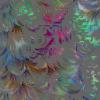

....................octave 1/3
....................octave 2/3
....................octave 3/3


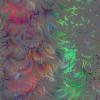

....................octave 1/3
....................octave 2/3
....................octave 3/3


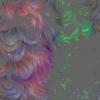

....................octave 1/3
....................octave 2/3
....................octave 3/3


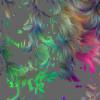

....................octave 1/3
....................octave 2/3
....................octave 3/3


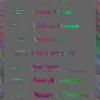

....................octave 1/3
....................octave 2/3
....................octave 3/3


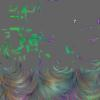

....................octave 1/3
....................octave 2/3
....................octave 3/3


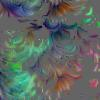

....................octave 1/3
....................octave 2/3
....................octave 3/3


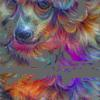

....................octave 1/3
....................octave 2/3
....................octave 3/3


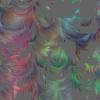

....................octave 1/3
....................octave 2/3
....................octave 3/3


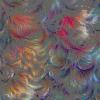

....................octave 1/3
....................octave 2/3
....................octave 3/3


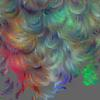

....................octave 1/3
....................octave 2/3
....................octave 3/3


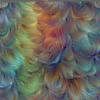

....................octave 1/3
....................octave 2/3
....................octave 3/3


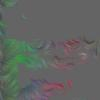

....................octave 1/3
....................octave 2/3
....................octave 3/3


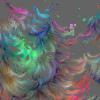

....................octave 1/3
....................octave 2/3
....................octave 3/3


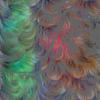

....................octave 1/3
....................octave 2/3
....................octave 3/3


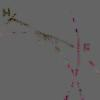

....................octave 1/3
....................octave 2/3
....................octave 3/3


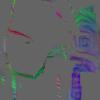

....................octave 1/3
....................octave 2/3
....................octave 3/3


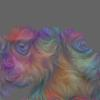

....................octave 1/3
....................octave 2/3
....................octave 3/3


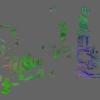

....................octave 1/3
....................octave 2/3
....................octave 3/3


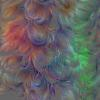

....................octave 1/3
....................octave 2/3
....................octave 3/3


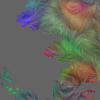

....................octave 1/3
....................octave 2/3
....................octave 3/3


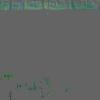

....................octave 1/3
....................octave 2/3
....................octave 3/3


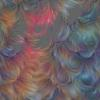

....................octave 1/3
....................octave 2/3
....................octave 3/3


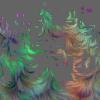

....................octave 1/3
....................octave 2/3
....................octave 3/3


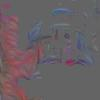

....................octave 1/3
....................octave 2/3
....................octave 3/3


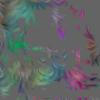

....................octave 1/3
....................octave 2/3
....................octave 3/3


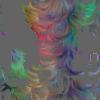

....................octave 1/3
....................octave 2/3
....................octave 3/3


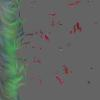

....................octave 1/3
....................octave 2/3
....................octave 3/3


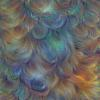

....................octave 1/3
....................octave 2/3
....................octave 3/3


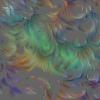

....................octave 1/3
....................octave 2/3
....................octave 3/3


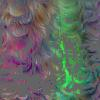

....................octave 1/3
....................octave 2/3
....................octave 3/3


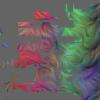

....................octave 1/3
....................octave 2/3
....................octave 3/3


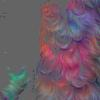

....................octave 1/3
....................octave 2/3
....................octave 3/3


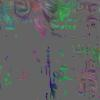

....................octave 1/3
....................octave 2/3
....................octave 3/3


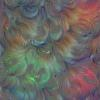

....................octave 1/3
....................octave 2/3
....................octave 3/3


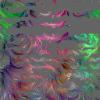

....................octave 1/3
....................octave 2/3
....................octave 3/3


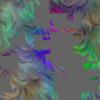

....................octave 1/3
....................octave 2/3
....................octave 3/3


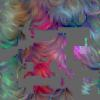

....................octave 1/3
....................octave 2/3
....................octave 3/3


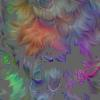

....................octave 1/3
....................octave 2/3
....................octave 3/3


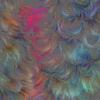

....................octave 1/3
....................octave 2/3
....................octave 3/3


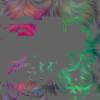

....................octave 1/3
....................octave 2/3
....................octave 3/3


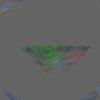

....................octave 1/3
....................octave 2/3
....................octave 3/3


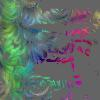

....................octave 1/3
....................octave 2/3
....................octave 3/3


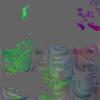

....................octave 1/3
....................octave 2/3
....................octave 3/3


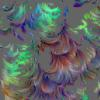

....................octave 1/3
....................octave 2/3
....................octave 3/3


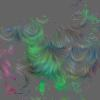

....................octave 1/3
....................octave 2/3
....................octave 3/3


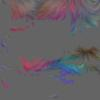

....................octave 1/3
....................octave 2/3
....................octave 3/3


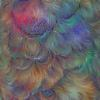

....................octave 1/3
....................octave 2/3
....................octave 3/3


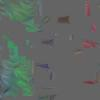

....................octave 1/3
....................octave 2/3
....................octave 3/3


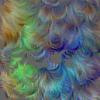

....................octave 1/3
....................octave 2/3
....................octave 3/3


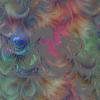

....................octave 1/3
....................octave 2/3
....................octave 3/3


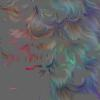

....................octave 1/3
....................octave 2/3
....................octave 3/3


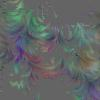

....................octave 1/3
....................octave 2/3
....................octave 3/3


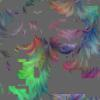

....................octave 1/3
....................octave 2/3
....................octave 3/3


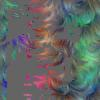

....................octave 1/3
....................octave 2/3
....................octave 3/3


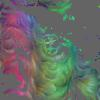

....................octave 1/3
....................octave 2/3
....................octave 3/3


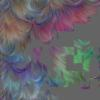

....................octave 1/3
....................octave 2/3
....................octave 3/3


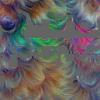

....................octave 1/3
....................octave 2/3
....................octave 3/3


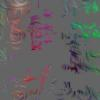

....................octave 1/3
....................octave 2/3
....................octave 3/3


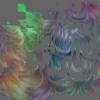

....................octave 1/3
....................octave 2/3
....................octave 3/3


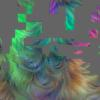

....................octave 1/3
....................octave 2/3
....................octave 3/3


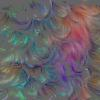

....................octave 1/3
....................octave 2/3
....................octave 3/3


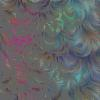

....................octave 1/3
....................octave 2/3
....................octave 3/3


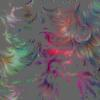

....................octave 1/3
....................octave 2/3
....................octave 3/3


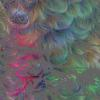

....................octave 1/3
....................octave 2/3
....................octave 3/3


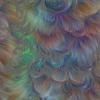

In [4]:
# h, w = 100, 100

# img0 = np.random.uniform(size=(h, w, 3)) + 100.0

n = len(cArray)

# octave_n = 3
# octave_scale = 1.4
# objectives = [T('mixed3b_5x5_bottleneck_pre_relu')[:,:,:,9], 
#               T('mixed3b_5x5_bottleneck_pre_relu')[:,:,:,0]]
# images = []
# for item in cArray:
#     mask = np.zeros((h, w, 3))
#     mask[:,:,1] = item.reshape(h, w)
#     mask[:,:,1] = item.reshape(h, w)
#     img1 = lapnorm_multi(objectives, img0, mask, iter_n=20, step=1.0, oct_n=3, oct_s=1.4, lap_n=4)
#     images.append[img1]
    
# for img in images:
#     display_image(img)

h, w = 100, 100



octave_n = 3
octave_scale = 1.4
objectives = [T('mixed4d_5x5_bottleneck_pre_relu')[:,:,:,11]]

# repeat the generation loop 20 times. notice the feedback -- we make img and then use it the initial input 
for f in cArray:
    # start with random noise
    img = np.random.uniform(size=(h, w, 3)) + 100.0
    mask = np.zeros((h, w, 3))
    mask[:,:,0] = f.reshape(h, w)
    mask[:,:,1] = f.reshape(h, w)
    img = lapnorm_multi(objectives, img, mask, iter_n=20, step=1.0, oct_n=3, oct_s=1.4, lap_n=4, clear=False)
    display_image(img)    # let's see it
    img = resize(img[10:-10,10:-10,:], (h, w))  # before looping back, crop the border by 10 pixels, resize, repeat    